In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("world-happiness-report.csv")
df.head(5)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


In [6]:
from os import mkdir #dopsya açma 

In [7]:
try:
  mkdir("Plots")

except:
  pass
  mypath="Plots"

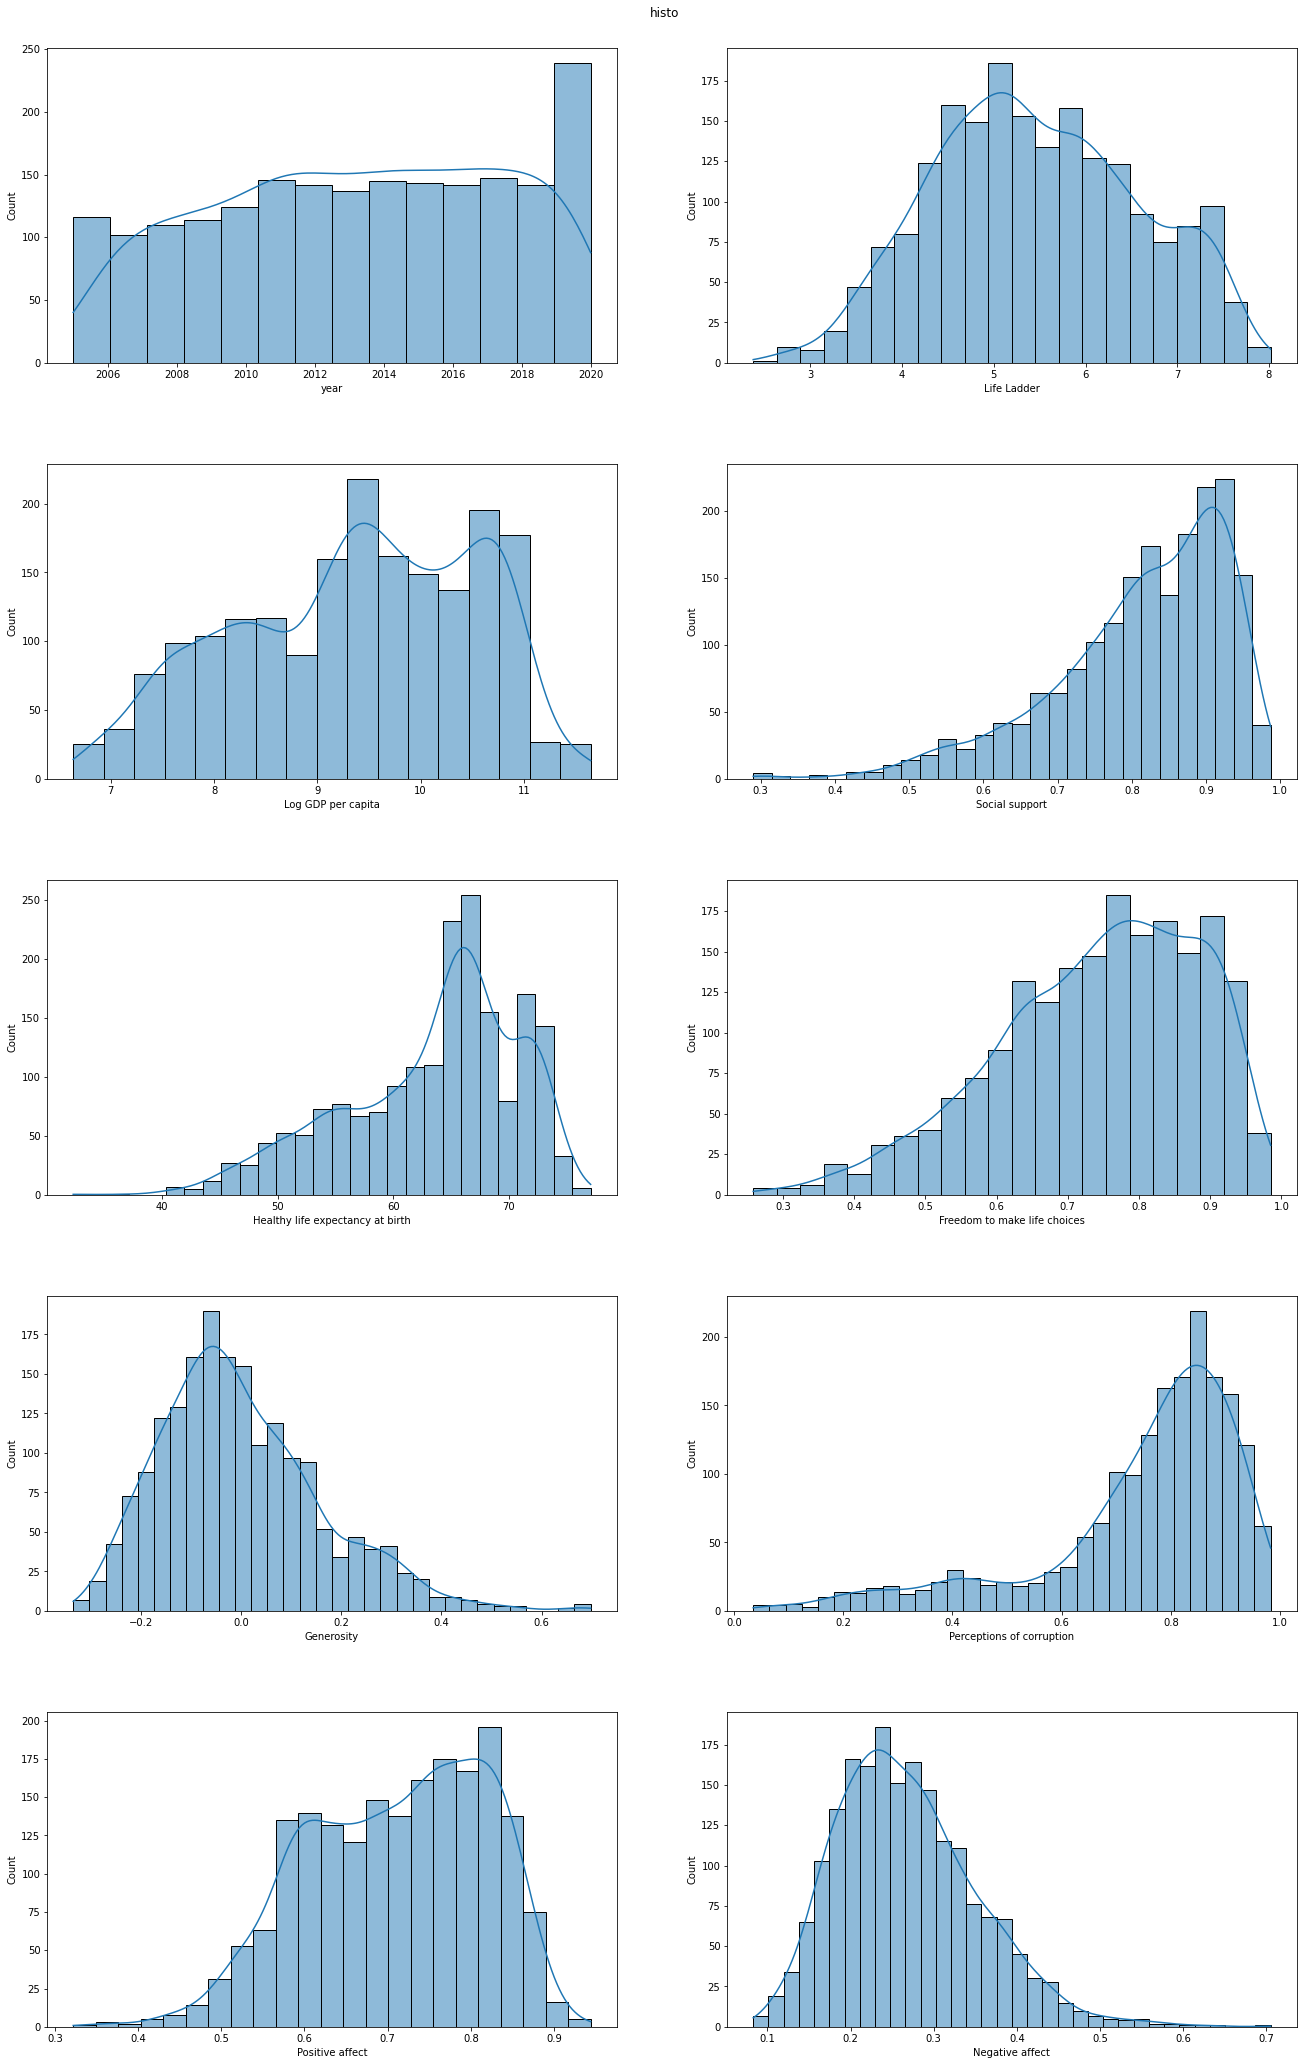

In [8]:
f,axes= plt.subplots(5,2, figsize=(20,30))
f.tight_layout(pad=8) #bosluk
f.suptitle("histo")  #ust yazi
cols=df.select_dtypes(exclude="object").columns #sayisal deger getir

x_axes=0
y_axes=0

for col in cols:  #colon gorsellesirme
  sns.histplot(data=df,x=col,kde=True,ax=axes[x_axes,y_axes]) #kd grafik egri

  if y_axes==1:
    y_axes=0  #kolon doldukca x'i arttir 
    x_axes+=1
  else:
    y_axes+=1
plt.savefig("Plots/histo.png")
plt.show()


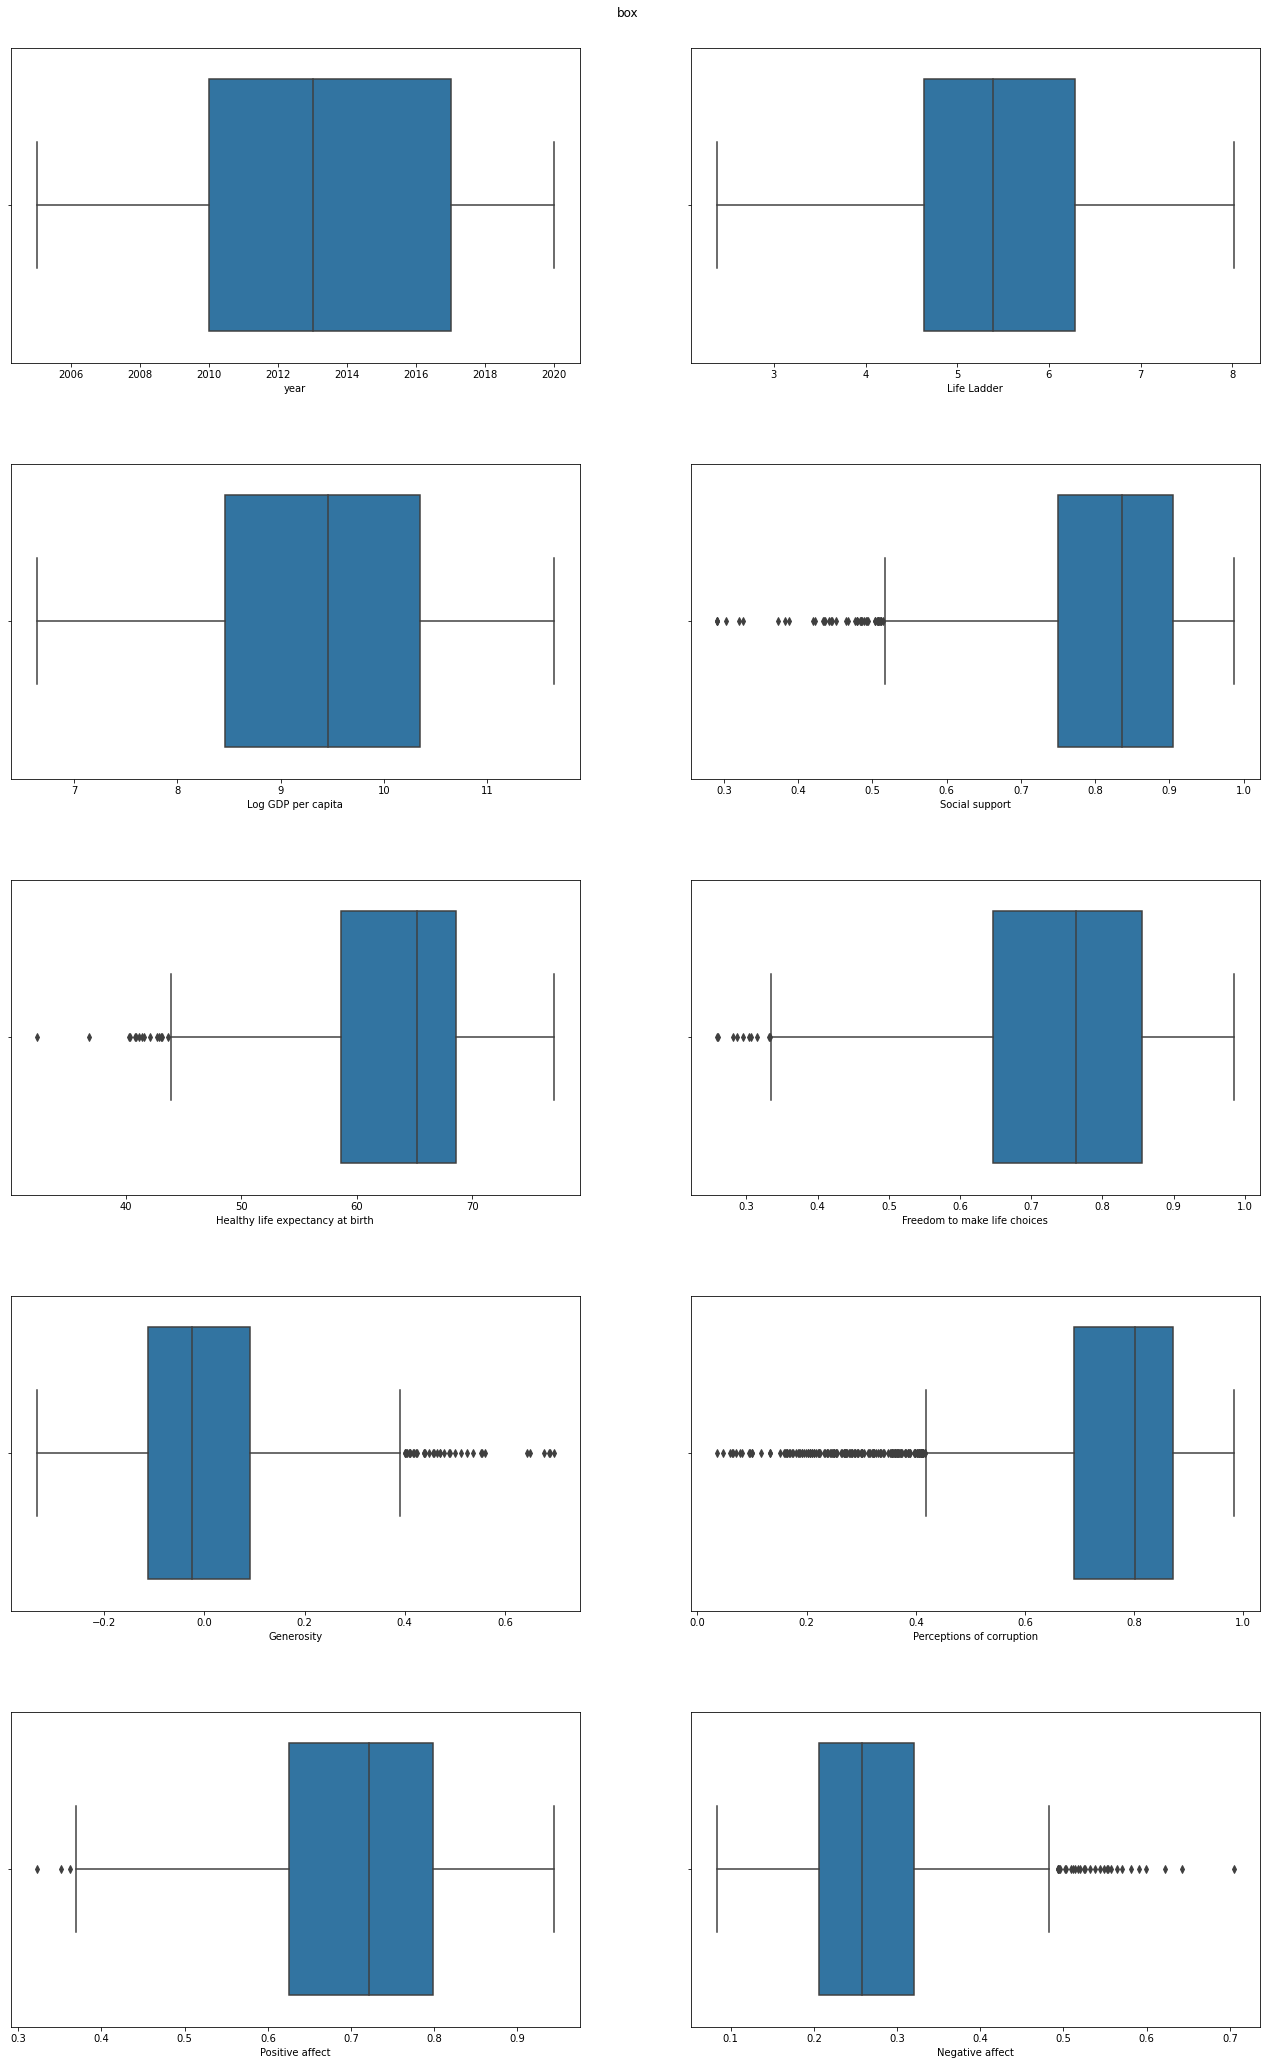

In [ ]:
f,axes= plt.subplots(5,2, figsize=(20,30))
f.tight_layout(pad=8) #bosluk
f.suptitle("box")  #ust yazi
cols=df.select_dtypes(exclude="object").columns #sayisal deger getir

x_axes=0
y_axes=0

for col in cols:  #colon gorsellesirme
  sns.boxplot(data=df,x=col,ax=axes[x_axes,y_axes]) #kd grafik egri

  if y_axes==1:
    y_axes=0  #kolon doldukca x'i arttir 
    x_axes+=1
  else:
    y_axes+=1
plt.savefig("Plots/box.png")
plt.show()


In [9]:
#social support yuzunden outlier olmus 

In [10]:
a=df.groupby(by="year").mean()

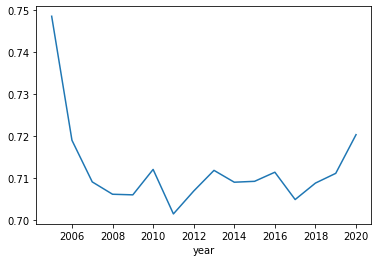

In [11]:
a["Positive affect"].plot()
plt.savefig("Plots/mean")

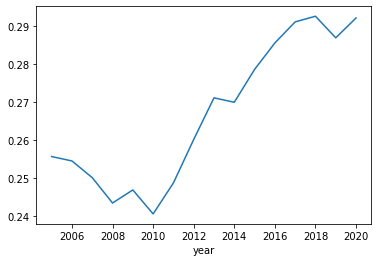

In [12]:
a["Negative affect"].plot()
plt.savefig("Plots/mean1")

In [13]:
df.corr()  #social supp& life ladder

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.035515,0.078246,-0.010093,0.164059,0.222151,-0.043422,-0.081478,-0.003245,0.196869
Life Ladder,0.035515,1.000000,0.790166,0.707806,0.744506,0.528063,0.190632,-0.427245,0.532273,-0.297488
Log GDP per capita,0.078246,0.790166,1.000000,0.692602,0.848049,0.367932,-0.000915,-0.345511,0.302282,-0.210781
Social support,-0.010093,0.707806,0.692602,1.000000,0.616037,0.410402,0.067000,-0.219040,0.432152,-0.395865
Healthy life expectancy at birth,0.164059,0.744506,0.848049,0.616037,1.000000,0.388681,0.020737,-0.322461,0.318247,-0.139477
Freedom to make life choices,0.222151,0.528063,0.367932,0.410402,0.388681,1.000000,0.329300,-0.487883,0.606114,-0.267661
Generosity,-0.043422,0.190632,-0.000915,0.067000,0.020737,0.329300,1.000000,-0.290706,0.358006,-0.092542
Perceptions of corruption,-0.081478,-0.427245,-0.345511,-0.219040,-0.322461,-0.487883,-0.290706,1.000000,-0.296517,0.264225
Positive affect,-0.003245,0.532273,0.302282,0.432152,0.318247,0.606114,0.358006,-0.296517,1.000000,-0.374439
Negative affect,0.196869,-0.297488,-0.210781,-0.395865,-0.139477,-0.267661,-0.092542,0.264225,-0.374439,1.000000


In [14]:
#0.7 ustu --> guclu korr

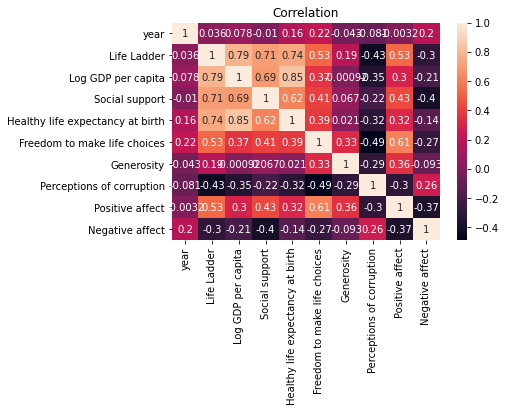

In [15]:
plt.title("Correlation")
sns.heatmap(df.corr(),annot=True)
plt.savefig("Plots/corr.png")

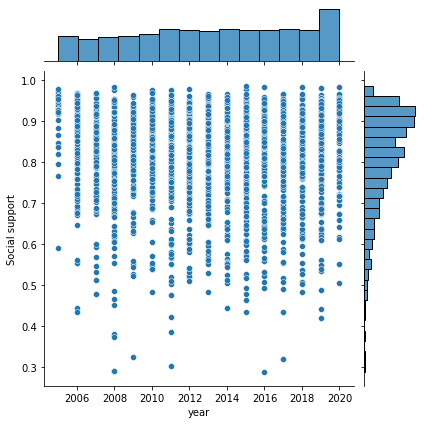

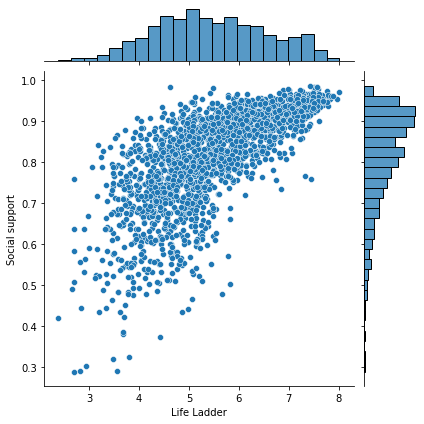

In [25]:
#joint plot

sns.jointplot(data=df,x="year",y="Social support")
sns.jointplot(data=df,x="Life Ladder",y="Social support") #en sonu kaydediyor--> pltsavefig

plt.savefig("Plots/grap.png")

In [17]:
import os
from os import listdir,mkdir 


In [21]:
a=os.listdir("Plots")

In [22]:
reports =[f"Plots/{file}" for file in  a]

In [23]:
reports

['Plots/corr.png',
 'Plots/mean.png',
 'Plots/grap.png',
 'Plots/histo.png',
 'Plots/mean1.png']

In [24]:
!pip install FPDF

  Created wheel for FPDF: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=8a990cc8c2db7f120c6db924b42c3f7a2408c359678f3643edc346f347853475
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built FPDF


In [34]:
from fpdf import FPDF

In [35]:
WIDTH=210
WEIGHT=297

In [39]:
pdf=FPDF()
pdf.set_font("Arial","B",54)
pdf.add_page()
pdf.cell(190,20,txt="Report",align="C")
for report in reports:
  pdf.add_page()
  pdf.set_font("Arial","B",24)
  pdf.cell(190,20,txt=report,align="C")
  pdf.image(report,5,36,WIDTH-5)
pdf.output("report1.pdf")


''